1. What is the most popular genre in different times?(time series analysis)
What is the most frequent combination of tags?(itemset mining)
What genre of games should be made nowadays or in the near future and what tags
should they have in order to be profitable? (matrix, regression)

In [466]:
import pandas as pd

df = pd.read_csv('data/steam.csv')
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


Itemset Mining

In [467]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

df['genres_list'] = df['genres'].str.split(';')
te = TransactionEncoder()
te_ary = te.fit(df['genres_list']).transform(df['genres_list'])
df_ap = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_ap, min_support=0.05, use_colnames=True).sort_values(by='support', ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[frequent_itemsets['length'] == 1].head(5))
print(frequent_itemsets[frequent_itemsets['length'] == 2].head(5))
print(frequent_itemsets[frequent_itemsets['length'] >= 3].head(5))

    support     itemsets  length
5  0.717304      (Indie)       1
0  0.439631     (Action)       1
2  0.377101     (Casual)       1
1  0.370526  (Adventure)       1
8  0.193795   (Strategy)       1
     support             itemsets  length
12  0.339169      (Action, Indie)       2
20  0.294663      (Casual, Indie)       2
17  0.281551   (Adventure, Indie)       2
9   0.167165  (Action, Adventure)       2
26  0.135512    (Strategy, Indie)       2
     support                     itemsets  length
28  0.135143   (Action, Adventure, Indie)       3
29  0.110175      (Action, Casual, Indie)       3
32  0.100609   (Casual, Adventure, Indie)       3
33  0.074386      (RPG, Adventure, Indie)       3
34  0.065559  (Simulation, Casual, Indie)       3


In [468]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.sort_values(by='confidence', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,"(Action, Casual)",(Indie),0.125540,0.717304,0.110175,0.877611,1.223486,0.020125,2.309818,0.208887
17,"(Action, Early Access)",(Indie),0.063306,0.717304,0.053777,0.849475,1.184261,0.008367,1.878067,0.166107
11,"(RPG, Adventure)",(Indie),0.089012,0.717304,0.074386,0.835685,1.165036,0.010537,1.720449,0.155499
16,"(Casual, Strategy)",(Indie),0.070729,0.717304,0.058430,0.826110,1.151687,0.007696,1.625715,0.141733
10,(Early Access),(Indie),0.109104,0.717304,0.088310,0.809411,1.128407,0.010049,1.483276,0.127731


In [469]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(Adventure),"(RPG, Indie)",0.370526,0.118744,0.074386,0.200758,1.690672,0.030388,1.102614,0.648986
27,"(RPG, Indie)",(Adventure),0.118744,0.370526,0.074386,0.626439,1.690672,0.030388,1.685061,0.463565
29,(RPG),"(Adventure, Indie)",0.159224,0.281551,0.074386,0.467177,1.659296,0.029556,1.348382,0.472581
28,"(Adventure, Indie)",(RPG),0.281551,0.159224,0.074386,0.264200,1.659296,0.029556,1.142669,0.553046
41,(Strategy),(Simulation),0.193795,0.191837,0.059797,0.308557,1.608431,0.022620,1.168806,0.469206
40,(Simulation),(Strategy),0.191837,0.193795,0.059797,0.311706,1.608431,0.022620,1.171309,0.468069
21,(Adventure),(RPG),0.370526,0.159224,0.089012,0.240231,1.508759,0.030015,1.106620,0.535692
20,(RPG),(Adventure),0.159224,0.370526,0.089012,0.559035,1.508759,0.030015,1.427491,0.401063
49,"(Action, Indie)",(Early Access),0.339169,0.109104,0.053777,0.158554,1.453231,0.016772,1.058767,0.471949
52,(Early Access),"(Action, Indie)",0.109104,0.339169,0.053777,0.492891,1.453231,0.016772,1.303134,0.350073


Preprocessing

In [470]:
import matplotlib.pyplot as plt
import seaborn as sns

df['owners'] = (df['owners'].str.split('-').str[0].astype(int) + df['owners'].str.split('-').str[1].astype(int)) / 2
df['price'] = df['price'].astype(float)
df['revenue'] = df['owners'] * df['price']
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['year_month'] = df['release_date'].dt.strftime('%Y-%m')
df.sort_values(by='revenue', ascending=False).head(5)
df_exploded = df.explode('genres_list')

year_game_count = df.groupby(df['year_month'])['name'].count()
year_game_count = year_game_count.reset_index().rename(columns={'name': 'count'})

year_genre_count = df_exploded.groupby(['genres_list', df_exploded['year_month']])['name'].count()
year_genre_count = year_genre_count.reset_index().rename(columns={'name': 'count'})
year_genre_count = pd.merge(year_genre_count, year_game_count, on='year_month')
year_genre_count['share'] = year_genre_count['count_x'] / year_genre_count['count_y']

year_game_revenue = df.groupby(df['year_month'])['revenue'].sum()
year_game_revenue = year_game_revenue.reset_index()

year_genre_revenue = df_exploded.groupby(['genres_list', df_exploded['year_month']])['revenue'].sum()
year_genre_revenue = year_genre_revenue.reset_index()
year_genre_revenue = pd.merge(year_genre_revenue, year_game_revenue, on='year_month')
year_genre_revenue['share'] = year_genre_revenue['revenue_x'] / year_genre_revenue['revenue_y']

In [471]:
top_genres_count = year_genre_count.groupby('genres_list')['count_x'].sum().sort_values(ascending=False).head(7).index.tolist()
top_genres_revenue = year_genre_revenue.groupby('genres_list')['revenue_x'].sum().sort_values(ascending=False).head(7).index.tolist()
top_genres = list(set(top_genres_count + top_genres_revenue))
top_genres

['Action',
 'Massively Multiplayer',
 'RPG',
 'Casual',
 'Strategy',
 'Indie',
 'Adventure',
 'Simulation']

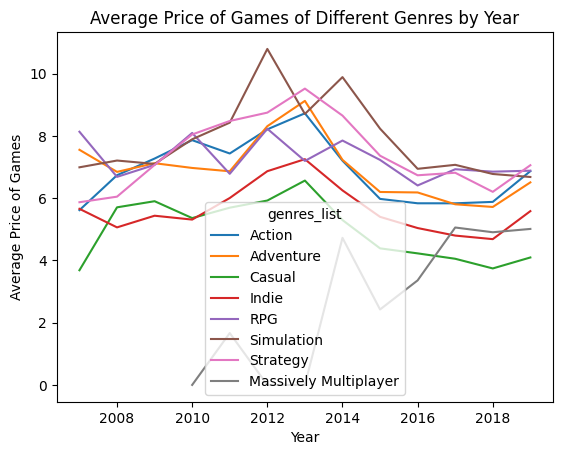

In [472]:
data = df_exploded[(df_exploded['year'] >= 2007) & (df_exploded['genres_list'].isin(top_genres))]
sns.lineplot(data=data.groupby(['year', 'genres_list'])['price'].mean().reset_index(), x='year', y='price', hue='genres_list')
plt.xlabel('Year')
plt.ylabel('Average Price of Games')
plt.title('Average Price of Games of Different Genres by Year')
plt.show()

impute missing months

In [473]:
year_genre_count = year_genre_count[year_genre_count['genres_list'].isin(top_genres) & (year_genre_count['year_month'] >= '2008-01')]

year_genre_revenue = year_genre_revenue[year_genre_revenue['genres_list'].isin(top_genres) & (year_genre_revenue['year_month'] >= '2008-01')]

all_months = pd.date_range(start='2008-01', end='2019-05', freq='M').to_period('M')
multi_index = pd.MultiIndex.from_product([year_genre_count['genres_list'].unique(), all_months], names=['genres_list', 'year_month'])
template_df = pd.DataFrame(index=multi_index).reset_index()
template_df['year_month'] = template_df['year_month'].astype(str)

year_genre_count = template_df.merge(year_genre_count, on=['genres_list', 'year_month'], how='left').fillna(0)

year_genre_revenue = template_df.merge(year_genre_revenue, on=['genres_list', 'year_month'], how='left').fillna(0)

MA

In [474]:
# year_genre_count['Moving_Average'] = year_genre_count.groupby('genres_list')['share'].transform(lambda x: x.rolling(window=6).mean())
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=year_genre_count, x='year_month', y='Moving_Average', hue='genres_list')
# plt.xlabel('year_month')
# plt.ylabel('Proportion of Game Genres')
# plt.title('Monthly Trends of Proportion of Game Genres (6 Month MA)')
# plt.xticks(ticks=year_genre_count['year_month'][::12], rotation=45)
# plt.show()

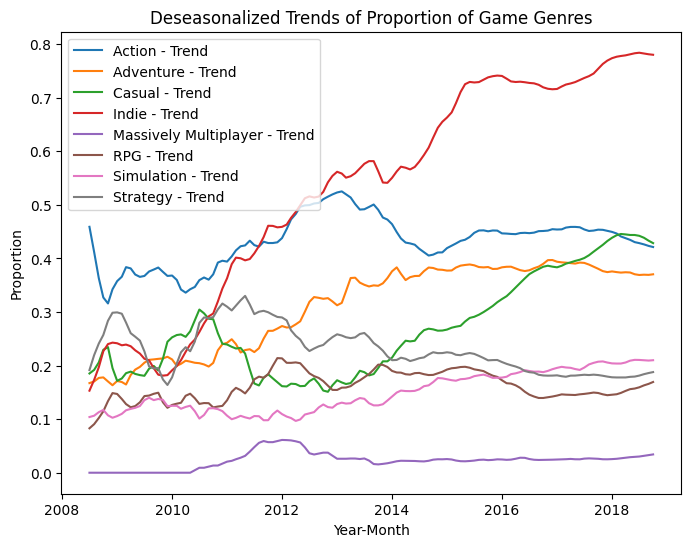

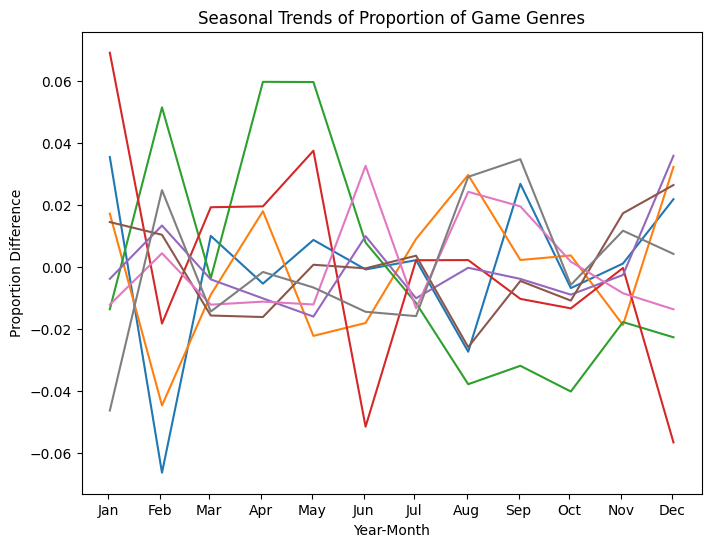

In [475]:
import statsmodels.api as sm
import calendar
year_genre_count['year_month'] = pd.to_datetime(year_genre_count['year_month'])
year_genre_count.set_index('year_month', inplace=True)

genres = year_genre_count['genres_list'].unique()

plt.figure(figsize=(8, 6))

# Loop through each genre and plot its trend
for i, genre in enumerate(genres):
    # Filter data for the genre
    genre_data = year_genre_count[year_genre_count['genres_list'] == genre]['share']

    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(genre_data, model='additive', period=12)

    # Plotting the trend component
    plt.plot(decomposition.trend, label=f'{genre} - Trend')

# Adding legend and titles
plt.title('Deseasonalized Trends of Proportion of Game Genres')
plt.xlabel('Year-Month')
plt.ylabel('Proportion')
plt.legend()

plt.show()

plt.figure(figsize=(8, 6))
for i, genre in enumerate(genres):
    # Filter data for the genre
    genre_data = year_genre_count[year_genre_count['genres_list'] == genre]['share']

    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(genre_data, model='additive', period=12)

    # Plotting the trend component
    plt.plot(decomposition.seasonal.iloc[:12] , label=f'{genre} - Trend')

# Adding legend and titles
date_labels = pd.date_range(start='2007-12-01', periods=12, freq='M')
plt.title('Seasonal Trends of Proportion of Game Genres')
plt.xticks(date_labels, [calendar.month_abbr[i+1] for i in range(12)])
plt.xlabel('Year-Month')
plt.ylabel('Proportion Difference')

plt.show()


In [476]:
# year_genre_revenue['Moving_Average'] = year_genre_revenue.groupby('genres_list')['share'].transform(lambda x: x.rolling(window=12).mean())
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=year_genre_revenue, x='year_month', y='Moving_Average', hue='genres_list')
# plt.xlabel('year_month')
# plt.ylabel('Market Share of Game Genres')
# plt.title('Monthly Trends of Market Share of Game Genres (12 Month MA)')
# plt.xticks(ticks=year_genre_revenue['year_month'][::12], rotation=45)
# plt.show()

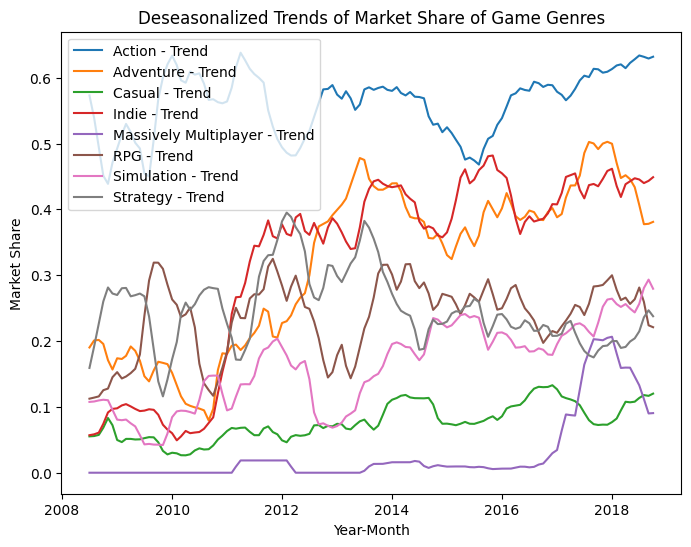

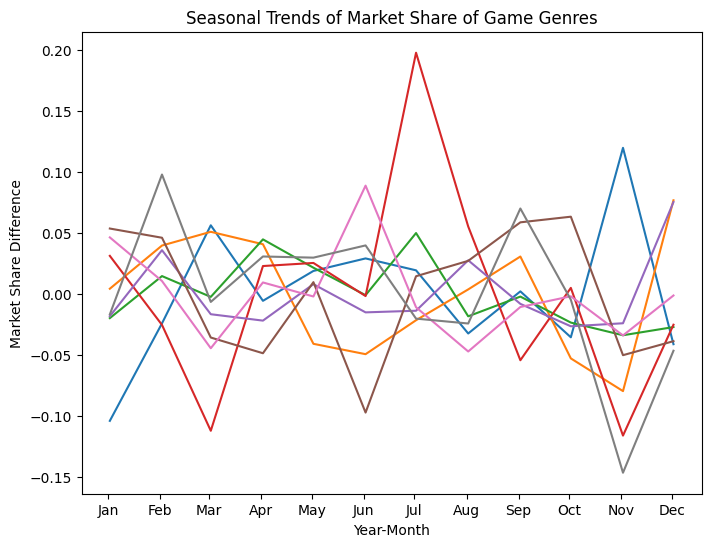

In [477]:
year_genre_revenue['year_month'] = pd.to_datetime(year_genre_revenue['year_month'])
year_genre_revenue.set_index('year_month', inplace=True)

genres = year_genre_revenue['genres_list'].unique()

plt.figure(figsize=(8, 6))

# Loop through each genre and plot its trend
for i, genre in enumerate(genres):
    # Filter data for the genre
    genre_data = year_genre_revenue[year_genre_revenue['genres_list'] == genre]['share']

    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(genre_data, model='additive', period=12)

    # Plotting the trend component
    plt.plot(decomposition.trend, label=f'{genre} - Trend')

# Adding legend and titles
plt.title('Deseasonalized Trends of Market Share of Game Genres')
plt.xlabel('Year-Month')
plt.ylabel('Market Share')
plt.legend()

plt.show()

plt.figure(figsize=(8, 6))
for i, genre in enumerate(genres):
    # Filter data for the genre
    genre_data = year_genre_revenue[year_genre_revenue['genres_list'] == genre]['share']

    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(genre_data, model='additive', period=12)

    # Plotting the trend component
    plt.plot(decomposition.seasonal.iloc[:12] , label=f'{genre} - Trend')

# Adding legend and titles
date_labels = pd.date_range(start='2007-12-01', periods=12, freq='M')
plt.title('Seasonal Trends of Market Share of Game Genres')
plt.xticks(date_labels, [calendar.month_abbr[i+1] for i in range(12)])
plt.xlabel('Year-Month')
plt.ylabel('Market Share Difference')

plt.show()

ARIMA

In [478]:
# genres = year_genre_revenue['genres_list'].unique()
# genre_specific_dfs = {}
# for genre in genres:
#     genre_specific_dfs[genre] = year_genre_revenue[year_genre_revenue['genres_list'] == genre]
#     genre_specific_dfs[genre]['year_month'] = pd.to_datetime(genre_specific_dfs[genre]['year_month'])
#     genre_specific_dfs[genre] = genre_specific_dfs[genre].set_index('year_month')
    

# from pmdarima import auto_arima

# arima_models = {}
# for genre, g_df in genre_specific_dfs.items():
#     # Assuming 'time_series_data' is your time series column
#     ts_data = g_df['share']

#     model = auto_arima(ts_data, seasonal=False, stepwise=True)
#     arima_models[genre] = model

# for genre, model in arima_models.items():
#     model.fit(genre_specific_dfs[genre]['share'])
# for genre, model in arima_models.items():
#     ts_data = genre_specific_dfs[genre]['share']
#     forecast = model.predict(n_periods=len(ts_data))

#     plt.figure(figsize=(10, 6))
#     plt.plot(ts_data.index, ts_data, label='Original')
#     plt.plot(ts_data.index, forecast, label='Forecasted')
#     plt.title(f'{genre} Genre Time Series Forecast')
#     plt.legend()
#     plt.show()